# Input


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving final_dataset.csv to final_dataset.csv
User uploaded file "final_dataset.csv" with length 2119572 bytes


In [ ]:
import json
import csv

import numpy as np
import pandas as pd

f_data_200 = pd.read_csv('final_dataset.csv')
f_data_200.describe()

,Unnamed: 0,ft_total_changes,ft_addns,ft_delns
count,3400.000000,3400.000000,3400.000000,3400.000000
mean,6470.702353,584.115000,385.935882,198.179118
std,3782.083383,9598.743734,5511.007475,4654.025515
min,0.000000,0.000000,0.000000,0.000000
25%,3458.750000,3.000000,1.000000,1.000000
50%,6290.000000,12.000000,7.000000,2.000000
75%,9927.250000,59.000000,38.000000,11.000000
max,12683.000000,512113.000000,257106.000000,255007.000000


# Analysis


In [ ]:
f_data_200.shape

(3400, 19)

In [ ]:
f_data_200.head()

,Unnamed: 0,ft_uname,ft_rname,ft_commit_date,author_association,merged_status,pull_title,pull_msg,pullauthordate,pullid,ft_total_changes,ft_addns,ft_delns,commitauthordate,commitid,pullcommitsha,pullcommitmsg,repodesc,repolang
0,0,0xflotus,contain-facebook,2018-11-26T22:17:57Z,CONTRIBUTOR,True,fixed Multi-Account in README,Shouldn't it be Multi-Account?,2018-11-26T23:12:38Z,https://api.github.com/repos/mozilla/contain-f...,2,1,1,2018-11-26T22:17:57Z,590611baa99e9dafba1bf637147bfc5765734c8d,590611baa99e9dafba1bf637147bfc5765734c8d,fixed Multi-Account in README\n\nShouldn't it ...,Facebook Container isolates your Facebook acti...,JavaScript
1,1,AlexLakatos,Reps,2017-03-02T21:40:01Z,CONTRIBUTOR,True,adding the first issue of the reps newsletter,NaN,2017-03-02T21:40:16Z,https://api.github.com/repos/mozilla/Reps/pull...,911,911,0,2017-03-02T21:40:01Z,f3928d09c3097aac82d95143845cee13f45835e1,f3928d09c3097aac82d95143845cee13f45835e1,adding the first issue of the reps newsletter,This is the Repo for tracking the goals of the...,HTML
2,2,AlexLakatos,Reps,2017-03-31T22:36:41Z,CONTRIBUTOR,True,added reps newsletter for march,NaN,2017-03-31T22:36:57Z,https://api.github.com/repos/mozilla/Reps/pull...,1128,1128,0,2017-03-31T22:36:41Z,07b1619ca86e1d2bf12229ed6d3e4c70593f2af0,07b1619ca86e1d2bf12229ed6d3e4c70593f2af0,added reps newsletter for march,This is the Repo for tracking the goals of the...,HTML
3,3,AlexLakatos,Reps,2017-05-05T10:03:54Z,CONTRIBUTOR,True,adding the april issue of the newsletter,NaN,2017-05-05T10:06:16Z,https://api.github.com/repos/mozilla/Reps/pull...,1171,1171,0,2017-05-05T10:03:54Z,96ca23cfb51b704c2148812a0f6ed768eca3a6b1,96ca23cfb51b704c2148812a0f6ed768eca3a6b1,adding the april issue of the newsletter,This is the Repo for tracking the goals of the...,HTML
4,4,AlinSelagea,build-slaveapi,2017-10-25T08:42:22Z,CONTRIBUTOR,True,Revert bug 1399404,NaN,2017-10-25T08:45:20Z,https://api.github.com/repos/mozilla/build-sla...,25,15,10,2017-10-25T08:42:22Z,5b8bdbfbfe6a71b282e8fb15e7bb7a1c6d2b9da4,5b8bdbfbfe6a71b282e8fb15e7bb7a1c6d2b9da4,Revert bug 1399404,Part of releng tooling,Python


In [ ]:
f_data = f_data_200

In [ ]:
f_data.columns

Index(['Unnamed: 0', 'ft_uname', 'ft_rname', 'ft_commit_date',
       'author_association', 'merged_status', 'pull_title', 'pull_msg',
       'pullauthordate', 'pullid', 'ft_total_changes', 'ft_addns', 'ft_delns',
       'commitauthordate', 'commitid', 'pullcommitsha', 'pullcommitmsg',
       'repodesc', 'repolang'],
      dtype='object')

In [ ]:
f_data.nunique

<bound method DataFrame.nunique of       Unnamed: 0  ...    repolang
0              0  ...  JavaScript
1              1  ...        HTML
2              2  ...        HTML
3              3  ...        HTML
4              4  ...      Python
...          ...  ...         ...
3395       12634  ...      Python
3396       12635  ...      Python
3397       12681  ...      Python
3398       12682  ...         CSS
3399       12683  ...      Python

[3400 rows x 19 columns]>

In [ ]:
f_data.isna().sum()
# we can ignore these null messages, repository descriptions and langauges

Unnamed: 0               0
ft_uname                 0
ft_rname                 0
ft_commit_date           0
author_association       0
merged_status            0
pull_title               0
pull_msg              1007
pullauthordate           0
pullid                   0
ft_total_changes         0
ft_addns                 0
ft_delns                 0
commitauthordate         0
commitid                 0
pullcommitsha            0
pullcommitmsg            0
repodesc               109
repolang               392
dtype: int64

In [ ]:
# each user contributions to number of different repositories and sorted in decreasing order

user_diffrepos = f_data.groupby('ft_uname')['ft_rname'].nunique()
user_diffrepos.sort_values(ascending=False,inplace=True)
print(user_diffrepos)


ft_uname
Mozilla-GitHub-Standards    10
vladikoff                    7
mortonfox                    6
vbudhram                     6
spasovski                    6
                            ..
lucasr                       1
lsblakk                      1
lowks                        1
lougeniaC64                  1
0xflotus                     1
Name: ft_rname, Length: 750, dtype: int64


In [ ]:
# each repo with different user's contributions to it and sorted in decreasing order
repo_diffusers = f_data.groupby('ft_rname')['ft_uname'].nunique()
repo_diffusers.sort_values(ascending=False,inplace=True)
print(repo_diffusers)

ft_rname
django-browserid              23
django-csp                    23
infosec.mozilla.org           22
leadership-training           21
moz-corsica                   20
                              ..
fennec-distribution-sample     1
build-relengapi-clobberer      1
etp-search-volume-study        1
eslint-plugin-amo              1
minion-vm                      1
Name: ft_uname, Length: 305, dtype: int64


In [ ]:
# user_diffrepos_total 
f_data.groupby(['ft_uname','ft_rname']).size()
#print(user_diffrepos_total_changes_count)

ft_uname     ft_rname            
0xflotus     contain-facebook         1
AlexLakatos  Reps                     3
AlinSelagea  build-slaveapi           1
AlinT        bouncer-tests            1
AlphaRoy14   mozilla-campus-clubs     1
                                     ..
zacc         input-tests              1
zalun        Marketplace.Python      10
zbraniecki   b2gperf                  1
zee-moz      leadership-training      1
zyegfryed    bleach                   1
Length: 1078, dtype: int64

In [ ]:
 # # user_diffrepos_total_changes_count
 user_diffrepos_total_changes_count = f_data.groupby(['ft_uname','ft_rname'])['ft_total_changes'].sum()
 print(user_diffrepos_total_changes_count)

ft_uname     ft_rname            
0xflotus     contain-facebook           2
AlexLakatos  Reps                    3210
AlinSelagea  build-slaveapi            25
AlinT        bouncer-tests             10
AlphaRoy14   mozilla-campus-clubs       8
                                     ... 
zacc         input-tests                4
zalun        Marketplace.Python       859
zbraniecki   b2gperf                   13
zee-moz      leadership-training        2
zyegfryed    bleach                     4
Name: ft_total_changes, Length: 1078, dtype: int64


In [ ]:
 # # user_diffrepos_total_ft_addns_count
 user_diffrepos_total_addns_count = f_data.groupby(['ft_uname','ft_rname'])['ft_addns'].sum()
 print(user_diffrepos_total_addns_count)

ft_uname     ft_rname            
0xflotus     contain-facebook           1
AlexLakatos  Reps                    3210
AlinSelagea  build-slaveapi            15
AlinT        bouncer-tests              7
AlphaRoy14   mozilla-campus-clubs       4
                                     ... 
zacc         input-tests                2
zalun        Marketplace.Python       791
zbraniecki   b2gperf                    9
zee-moz      leadership-training        1
zyegfryed    bleach                     2
Name: ft_addns, Length: 1078, dtype: int64


In [ ]:
 # # user_diffrepos_ft_delns_count
 user_diffrepos_ft_delns_count = f_data.groupby(['ft_uname','ft_rname'])['ft_delns'].sum()
 print(user_diffrepos_ft_delns_count)

ft_uname     ft_rname            
0xflotus     contain-facebook         1
AlexLakatos  Reps                     0
AlinSelagea  build-slaveapi          10
AlinT        bouncer-tests            3
AlphaRoy14   mozilla-campus-clubs     4
                                     ..
zacc         input-tests              2
zalun        Marketplace.Python      68
zbraniecki   b2gperf                  4
zee-moz      leadership-training      1
zyegfryed    bleach                   2
Name: ft_delns, Length: 1078, dtype: int64


In [ ]:
 # # user_diffrepos_repolang_count
 user_diffrepos_repolang_count = f_data.groupby(['ft_uname','ft_rname'])['repolang'].nunique()
 print(user_diffrepos_repolang_count)
 user_diffrepos_repolang_count.sort_values(ascending=False,inplace=True)
 print(user_diffrepos_repolang_count)

ft_uname     ft_rname            
0xflotus     contain-facebook        1
AlexLakatos  Reps                    1
AlinSelagea  build-slaveapi          1
AlinT        bouncer-tests           0
AlphaRoy14   mozilla-campus-clubs    1
                                    ..
zacc         input-tests             0
zalun        Marketplace.Python      1
zbraniecki   b2gperf                 1
zee-moz      leadership-training     1
zyegfryed    bleach                  1
Name: repolang, Length: 1078, dtype: int64
ft_uname      ft_rname        
zyegfryed     bleach              1
emceeaich     moz-corsica         1
espadrine     doctorjs            1
escapewindow  configman           1
erogol        TTS                 1
                                 ..
nchapman      identity-pubkeys    0
tobbi         Addon-Tests         0
              input-tests         0
TDA           fxa-auth-mailer     0
chutten       data-review         0
Name: repolang, Length: 1078, dtype: int64


In [ ]:
#repo_languages_count
repo_languages_count = f_data.groupby(['repolang']).size()
print(repo_languages_count)
repo_languages_count.sort_values(ascending=False,inplace=True)
print(repo_languages_count)

repolang
ApacheConf                    1
Brightscript                  1
C                            10
C++                          40
CSS                         245
Clojure                       8
Dockerfile                    2
FreeMarker                   55
GCC Machine Description       2
Go                           20
HTML                         81
Java                         69
JavaScript                 1152
Jupyter Notebook              7
Less                         18
Lua                           1
Makefile                     10
Objective-C                   4
PHP                         149
Python                      923
Rust                        112
Shell                        97
Swift                         1
dtype: int64
repolang
JavaScript                 1152
Python                      923
CSS                         245
PHP                         149
Rust                        112
Shell                        97
HTML                         81
Java     

In [ ]:
#user_conributions_count
conributions_languages_count = f_data.groupby(['ft_uname']).size()
print(conributions_languages_count)
conributions_languages_count.sort_values(ascending=False,inplace=True)
print(conributions_languages_count)

ft_uname
0xflotus        1
AlexLakatos     3
AlinSelagea     1
AlinT           1
AlphaRoy14      1
               ..
zacc            1
zalun          10
zbraniecki      1
zee-moz         1
zyegfryed       1
Length: 750, dtype: int64
ft_uname
oremj            10
akatsoulas       10
rohit-rk         10
andrewhayward    10
robhudson        10
                 ..
kanru             1
keianhzo          1
kinetiknz         1
kingthorin        1
0xflotus          1
Length: 750, dtype: int64


In [ ]:
list_users = dict(conributions_languages_count)
print(list_users)
count =0
for key,pair in list_users.items():
    if pair == 10:
        count = count +1
print(count)

{'oremj': 10, 'akatsoulas': 10, 'rohit-rk': 10, 'andrewhayward': 10, 'robhudson': 10, 'lmorchard': 10, 'lonnen': 10, 'andreastt': 10, 'rlr': 10, 'rittme': 10, 'luciusbono': 10, 'almossawi': 10, 'rik': 10, 'luser': 10, 'alicoding': 10, 'brittanydionigi': 10, 'flodolo': 10, 'rfk': 10, 'Pomax': 10, 'retornam': 10, 'malini': 10, 'marco-c': 10, 'rehandalal': 10, 'alanmoo': 10, 'dpoirier': 10, 'rossbruniges': 10, 'djmitche': 10, 'Mozilla-GitHub-Standards': 10, 'sedge': 10, 'sinker': 10, 'kparlante': 10, 'kumar303': 10, 'deimidis': 10, 'shaybeau731': 10, 'kyoshino': 10, 'MichaelKohler': 10, 'g-k': 10, 'MihaiTabara': 10, 'leibovic': 10, 'secretrobotron': 10, 'lmandel': 10, 'seanmonstar': 10, 'leplatrem': 10, 'schalkneethling': 10, 'MikkCZ': 10, 'lesleyjanenorton': 10, 'diox': 10, 'linacambridge': 10, 'ryanwarsaw': 10, 'ryanschmidt': 10, 'lloyd': 10, 'rdalverny': 10, 'ajvb': 10, 'klahnakoski': 10, 'brianpeiris': 10, 'mozkeeler': 10, 'SuYoungHong': 10, 'pdehaan': 10, 'erikrose': 10, 'mqp': 10, '

In [ ]:
#user_conributions_count
conributions_languages_count = f_data.groupby(['ft_uname']).size().agg(['mean', 'min','median','count'])
print(conributions_languages_count)
conributions_languages_count.sort_values(ascending=False,inplace=True)
print(conributions_languages_count)

mean        4.533333
min         1.000000
median      3.000000
count     750.000000
dtype: float64
count     750.000000
mean        4.533333
median      3.000000
min         1.000000
dtype: float64


In [ ]:
#conributions_languages_count = 10 print
#conributions_languages_count.shape

In [ ]:
 # # user_total_changes_10rows
 user_total_changes_10rows = f_data.groupby(['ft_uname'])#['ft_total_changes'].sum()
 print(user_total_changes_10rows)

In [ ]:
user_total_changes_10rows.groups

{'0xflotus': [0], 'AlexLakatos': [1, 2, 3], 'AlinSelagea': [4], 'AlinT': [5], 'AlphaRoy14': [6], 'Archaeopteryx': [7, 8], 'AutomatedTester': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'BenWu': [19], 'CJKu': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'Callek': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'Darkspirit': [40], 'Dexterp37': [41, 42, 43, 44, 45, 46, 47, 48], 'DmytroLitvinov': [49], 'Doerge': [50], 'Eijebong': [51], 'EnTeQuAk': [52, 53, 54, 55, 56, 57], 'EricEdens': [58, 59, 60, 61, 62, 63, 64, 65, 66, 67], 'EricRahm': [68, 69], 'ErvisTusha': [70], 'FelixHeal': [71], 'FernandaBernardo': [72, 73, 74, 75, 76], 'Flimm': [77], 'FrancescoSTL': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87], 'Gozala': [88, 89, 90, 91, 92, 93, 94, 95, 96, 97], 'GraylinKim': [98], 'InFog': [99, 100, 101, 102], 'J0WI': [103, 104, 105, 106], 'JESCAH': [107], 'Jason-Cooke': [108], 'JerryShih': [109], 'Jesus805': [110], 'JohanLorenzo': [111], 'JshWright': [112], 'KWierso': [113, 114, 115, 116, 117, 118], 'KaiRo-at':

In [ ]:
#user_total_changes_10rows = user_total_changes_10rows.sort_values(ascending=False,inplace=True)
user_total_changes_10rows.groups
#user_total_changes_10rows.get_group('AlexLakatos')

{'0xflotus': [0], 'AlexLakatos': [1, 2, 3], 'AlinSelagea': [4], 'AlinT': [5], 'AlphaRoy14': [6], 'Archaeopteryx': [7, 8], 'AutomatedTester': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'BenWu': [19], 'CJKu': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'Callek': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'Darkspirit': [40], 'Dexterp37': [41, 42, 43, 44, 45, 46, 47, 48], 'DmytroLitvinov': [49], 'Doerge': [50], 'Eijebong': [51], 'EnTeQuAk': [52, 53, 54, 55, 56, 57], 'EricEdens': [58, 59, 60, 61, 62, 63, 64, 65, 66, 67], 'EricRahm': [68, 69], 'ErvisTusha': [70], 'FelixHeal': [71], 'FernandaBernardo': [72, 73, 74, 75, 76], 'Flimm': [77], 'FrancescoSTL': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87], 'Gozala': [88, 89, 90, 91, 92, 93, 94, 95, 96, 97], 'GraylinKim': [98], 'InFog': [99, 100, 101, 102], 'J0WI': [103, 104, 105, 106], 'JESCAH': [107], 'Jason-Cooke': [108], 'JerryShih': [109], 'Jesus805': [110], 'JohanLorenzo': [111], 'JshWright': [112], 'KWierso': [113, 114, 115, 116, 117, 118], 'KaiRo-at':

In [ ]:
each_count =0
for each in user_total_changes_10rows.groups:
    #user_total_changes_10rows.get_group(each)
    #print(each)
    name = str(each)
    each_count= each_count+1
    print(name)
    print(user_total_changes_10rows.get_group(name))

print(each_count)

Streaming output truncated to the last 5000 lines.
bobsilverberg
     Unnamed: 0       ft_uname  ...                          repodesc repolang
725        2824  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
726        2827  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
727        2830  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
728        2833  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
729        2836  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
730        2839  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
731        2842  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
732        2845  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
733        2848  bobsilverberg  ...  Tests for Mozilla Input website.      NaN
734        2850  bobsilverberg  ...  Tests for Mozilla Input website.      NaN

[10 rows x 19 columns]
brampitoyo
     Unnamed: 0  ... repolang
7

In [ ]:
'''
each_count =0
for each in user_total_changes_10rows.groups:
    #user_total_changes_10rows.get_group(each)
    #print(each)
    name = str(each)
    each_count= each_count+1
    print(name)
    print(user_total_changes_10rows.get_group(name))

print(each_count)
'''
user_name_list =[]
user_total_changes =[]
user_total_addns =[]
user_total_delns =[]
user_repo_lang = []

all_users_total_changes = []
all_users_total_addns = []
all_users_total_delns = []

all_users_repo_lang =[]
each_count=0
for each in user_total_changes_10rows.groups:
    #user_total_changes_10rows.get_group(each)
    #print(each)
    name = str(each)
    each_count= each_count+1
    #print(name)
    #print(user_total_changes_10rows.get_group(name))
    user_name_list.append(name)
    user_total_changes.append(user_total_changes_10rows.get_group(name)['ft_total_changes'])
    user_total_addns.append(user_total_changes_10rows.get_group(name)['ft_addns'])
    user_total_delns.append(user_total_changes_10rows.get_group(name)['ft_delns'])
    user_repo_lang.append(user_total_changes_10rows.get_group(name)['repolang'])

    all_users_total_changes.append(user_total_changes)
    all_users_total_addns.append(user_total_addns)
    all_users_total_delns.append(user_total_delns)
    all_users_repo_lang.append(user_repo_lang)

print(each_count)

#print(user_total_changes_10rows.get_group(name)['ft_total_changes'])

750


# Plots:
All plots from pandas: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4



In [ ]:
#all plots for final submission goes here..


In [ ]:
#1st individual plot for total changes in ten contributions 
#user= list_users[0]
total_changes =[]
total_list_of_changes =[]

for key, value in list_users.items():
    #if f_data['ft_rname'] == key:
     #   total_changes.append(f_data['ft_total_changes'])
    total_list_of_changes.append(total_changes)
print(total_changes)
print(total_list_of_changes)

[]
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [ ]:
print(all_users_total_changes[1][0])

0    2
Name: ft_total_changes, dtype: int64


In [ ]:
!pip install mpld3

     |████████████████████████████████| 890kB 9.0MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=9ceb2a59fe001450864207d0f8bf88d019f0ec80cef45b052c4611c716d8e612
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
!pip install pandas-bokeh

import pandas as pd
import pandas_bokeh

pandas_bokeh.output_notebook()



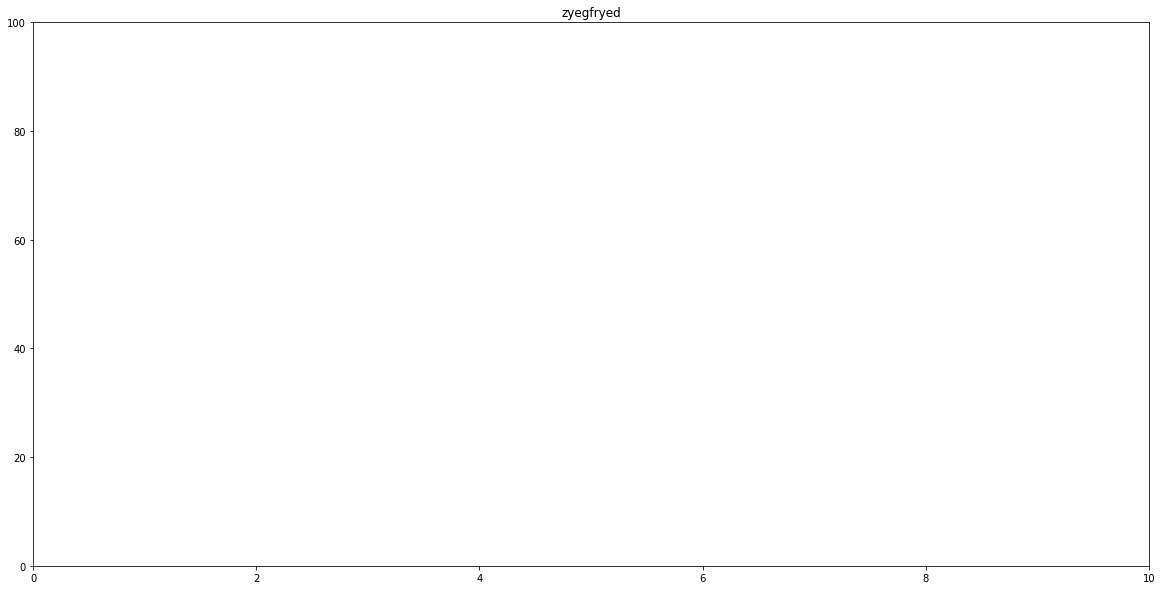

'\nall_users_total_changes.append(user_total_changes)\nall_users_total_addns.append(user_total_addns)\nall_users_total_delns.append(user_total_delns)\nall_users_repo_lang.append(user_repo_lang)'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

user_name_list =[]
user_total_changes =[]
user_total_addns =[]
user_total_delns =[]
user_repo_lang = []

all_users_total_changes = []
all_users_total_addns = []
all_users_total_delns = []

all_users_repo_lang =[]
each_count=0
fig = plt.figure(figsize = (20, 10))
df_list =[]
for each in user_total_changes_10rows.groups:
    #user_total_changes_10rows.get_group(each)
    #print(each)
    name = str(each)
    #each_count= each_count+1
    #print(name)
    #print(user_total_changes_10rows.get_group(name))
    user_total_changes =[]
    user_total_addns =[]
    user_total_delns =[]
    user_repo_lang = []
    indexes = []
    user_name_list.append(name)
    for i in user_total_changes_10rows.get_group(name)['ft_total_changes']:
        user_total_changes.append(i)
    num = len(user_total_changes)
    #print(len(user_total_changes))
    for i in user_total_changes_10rows.get_group(name)['ft_addns']:
        user_total_addns.append(i)
    for i in user_total_changes_10rows.get_group(name)['ft_delns']:
        user_total_delns.append(i)
    for i in user_total_changes_10rows.get_group(name)['repolang']:
        user_repo_lang.append(i)
    for i in user_total_changes_10rows.get_group(name)['ft_rname']:
        indexes.append(i)
    '''
    user_total_addns = np.array(user_total_addns)
    user_total_changes = np.array(user_total_changes)
    user_total_delns = np.array(user_total_delns)
    '''
    #print(user_total_addns.shape)
    #print(user_total_changes.shape)
    idx =[]
    for j in range(0,num):
        idx.append(j)
    df = pd.DataFrame({
    "total_changes": user_total_changes,
    "addition_changes": user_total_addns,
    "deletion_changes": user_total_delns,
    #'repo_changes':user_repo_lang,
    }, index=indexes,columns =['total_changes','addition_changes','deletion_changes'])
    #plt.figure()
    df['total_changes']= df['total_changes'].astype(int)
    df['addition_changes']= df['addition_changes'].astype(int)
    df['deletion_changes']= df['deletion_changes'].astype(int)

    df=df.astype(int)
    plt.title(name)
    #df_list.append(df)# for individual comment this line
    if len(indexes) == 10:
        lines = df.plot_bokeh(kind = 'line',title = name)
'''for fr in df_list:
    #fr.plot()
    plt.plot(fr['total_changes'],fr['addition_changes'],fr['deletion_changes'])'''
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

html_str = mpld3.fig_to_html(fig)
Html_file= open("contributions.html","w")
Html_file.write(html_str)
Html_file.close()
'''
all_users_total_changes.append(user_total_changes)
all_users_total_addns.append(user_total_addns)
all_users_total_delns.append(user_total_delns)
all_users_repo_lang.append(user_repo_lang)'''

In [ ]:
'''
name = user_name_list[4]

t_list = all_users_total_changes[]
print(t_list)
a_list = all_users_total_addns[4]
print(len(a_list))
d_list = all_users_total_delns[4]
print(len(d_list))
r_list = all_users_repo_lang[4]
print(len(r_list))'''

'''
df = pd.DataFrame({
   'total_changes':t_list,
   'addition_changes':a_list,
   'deletion_changes':d_list,
   'repo_changes':r_list,
   }, index=[0,1,2,3,4,5,6,7,8,9])

lines = df.plot.line()
'''

"\ndf = pd.DataFrame({\n   'total_changes':t_list,\n   'addition_changes':a_list,\n   'deletion_changes':d_list,\n   'repo_changes':r_list,\n   }, index=[0,1,2,3,4,5,6,7,8,9])\n\nlines = df.plot.line()\n"

In [ ]:
#repo_languages_count
repo_languages_count = f_data.groupby(['repolang']).size()
print(repo_languages_count)
#repo_languages_count.sort_values(ascending=False,inplace=True)
#print(repo_languages_count)
lang_names =[]
for i in f_data.groupby(['repolang']).groups:
    name = str(i)
    lang_names.append(name)
lang_count =[]
for i in repo_languages_count:
    lang_count.append(i)
    #lang_names.append(repo_languages_count.get_group(i))

#print()
print(lang_names)
print(lang_count)


repolang
ApacheConf                    1
Brightscript                  1
C                            10
C++                          40
CSS                         245
Clojure                       8
Dockerfile                    2
FreeMarker                   55
GCC Machine Description       2
Go                           20
HTML                         81
Java                         69
JavaScript                 1152
Jupyter Notebook              7
Less                         18
Lua                           1
Makefile                     10
Objective-C                   4
PHP                         149
Python                      923
Rust                        112
Shell                        97
Swift                         1
dtype: int64
['ApacheConf', 'Brightscript', 'C', 'C++', 'CSS', 'Clojure', 'Dockerfile', 'FreeMarker', 'GCC Machine Description', 'Go', 'HTML', 'Java', 'JavaScript', 'Jupyter Notebook', 'Less', 'Lua', 'Makefile', 'Objective-C', 'PHP', 'Python', 'Rust', 'Sh

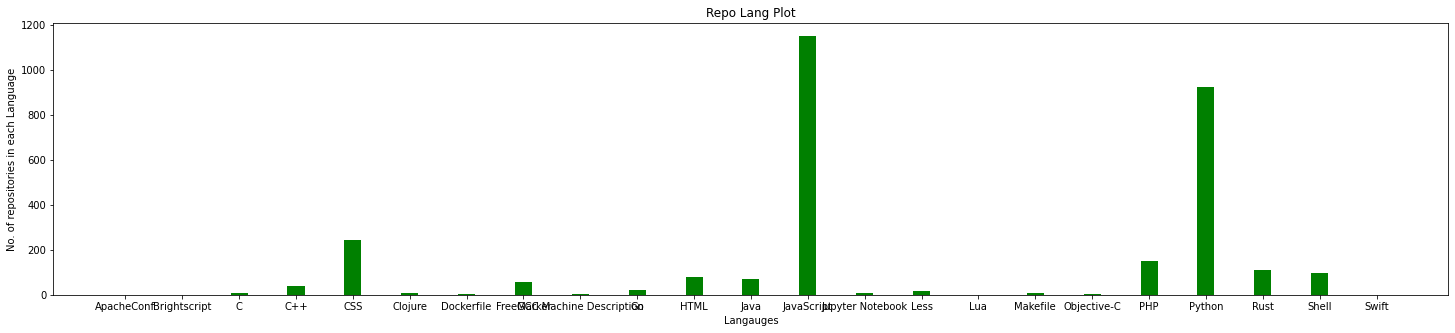

In [89]:
import numpy as np
import matplotlib.pyplot as plt

lang_df = pd.DataFrame({
    "lang_count": lang_count,
},columns = lang_names)

plt.figure(figsize = (25, 5))
'''
lang_df=lang_df.astype(int)
lang_df.plot.bar()
plt.axhline(0, color="k")
'''
plt.bar(lang_names, lang_count, color ='green',width = 0.3)
 
plt.xlabel("Langauges")
plt.ylabel("No. of repositories in each Language")
plt.title("Repo Lang Plot")
plt.show()

In [ ]:
# user_diffrepos_total 
users_five_repositories = f_data.groupby(['ft_uname','ft_rname']).size()
#print(user_diffrepos_total_changes_count)
users_five_repositories.sort_values(ascending=False,inplace=True)
print(users_five_repositories)


ft_uname       ft_rname                    
cadecairos     MakeAPI                         10
kparlante      kpiggybank                      10
bobsilverberg  input-tests                     10
tomato42       cipherscan                      10
klahnakoski    measure-noise                   10
                                               ..
keianhzo       androidspeech                    1
kanru          layerscope                       1
k88hudson      make-valet                       1
jvillalobos    addons-contribution-notifier     1
0xflotus       contain-facebook                 1
Length: 1078, dtype: int64


In [ ]:
f_count =0
for i in users_five_repositories:
    if i>=5:
        #print(i," ")#users_five_repositories.group(i))
        f_count = f_count +1
print("count is", f_count) 

count is 256


In [ ]:
# user_diffrepos_total 
users_five_repositories_groups = f_data.groupby(['ft_uname','ft_rname'])#.sort_values(ascending=False,inplace=True)
#print(user_diffrepos_total_changes_count)
#users_five_repositories_groups#.sort_values(ascending=False,inplace=True)
#print(users_five_repositories_groups.groups)
for each in users_five_repositories_groups.groups:
    #if(each.size>=5):
    #print(each)
    if(users_five_repositories[each]>=5):#users_five_repositories_groups.get_group(each).size >=5):
        print(each)
        


('AutomatedTester', 'input-tests')
('CJKu', 'layerscope')
('Callek', 'build-relengapi-slaveloan')
('Dexterp37', 'firefox-hardware-report')
('EricEdens', 'fennec-search')
('FernandaBernardo', 'games.mozilla.org')
('FrancescoSTL', 'bakery')
('Gozala', 'firefox-narrate-experiment')
('KWierso', 'deprecated-treestatus')
('LegNeato', 'mediawiki-bugzilla')
('Marlena', 'Addon-Tests')
('MartinBest', 'moz-corsica')
('MichaelKohler', 'activate.mozilla.community')
('MihaiTabara', 'build-funsize')
('MikkCZ', 'One-Mozilla-blog')
('Mossop', 'firefox-browser-architecture')
('Pomax', 'friendlycode')
('ReonSaji', 'OpenDesign')
('Rupal-IIITD', 'inclusion')
('ScottDowne', 'make-valet')
('Standard8', 'hello-tests')
('SuYoungHong', 'dscontrib')
('TDA', 'fxa-geodb')
('TrevorFSmith', 'action-input')
('Uberi', 'cerberus')
('WilsonKathleen', 'ca-policy')
('Zearin', 'html5-lint')
('acabunoc', 'leadership-training')
('acmiyaguchi', 'mozilla-schema-generator')
('adamkalis', 'buddyup')
('agjwong', 'jupyter-notebook

In [ ]:
# user_diffrepos_total 
users_five_repositories = f_data.groupby(['ft_uname']).nunique()
#print(user_diffrepos_total_changes_count)
users_five_repositories.sort_values(by = 'ft_rname',ascending=False,inplace=True)
#for i in users_five_repositories##:
#    if i >=5:
print(users_five_repositories['ft_rname'])

final_each_user_to_five_repos_series = users_five_repositories['ft_rname']


ft_uname
Mozilla-GitHub-Standards    10
vladikoff                    7
mortonfox                    6
spasovski                    6
clouserw                     6
                            ..
eaon                         1
edsu                         1
edwardabraham                1
ehsan                        1
zyegfryed                    1
Name: ft_rname, Length: 750, dtype: int64


In [ ]:
# user_diffrepos_total 
users_five_repositories_groups = f_data.groupby(['ft_uname'])#.sort_values(ascending=False,inplace=True)
#print(user_diffrepos_total_changes_count)
#users_five_repositories_groups#.sort_values(ascending=False,inplace=True)
#print(users_five_repositories_groups.groups)
final_each_user_to_five_repos_names = []
for each in users_five_repositories_groups.groups:
    #if(each.size>=5):
    #print(each)
    if(final_each_user_to_five_repos_series[each]>=5):#users_five_repositories_groups.get_group(each).size >=5):
        print(each)
        final_each_user_to_five_repos_names.append(each)
        


Mozilla-GitHub-Standards
TDA
adamlofting
clouserw
dannycoates
dependabot[bot]
flodolo
glogiotatidis
mortonfox
mstriemer
mythmon
oremj
ozten
pbkracker
philbooth
spasovski
vbudhram
vladikoff
willkg


     Unnamed: 0  ...    repolang
206         534  ...        HTML
207         535  ...  JavaScript
208         536  ...      Python
209         537  ...  JavaScript
210         538  ...      Python
211         539  ...      Python
212         540  ...         PHP
213         541  ...      Python
214         542  ...         CSS
215         543  ...      Python

[10 rows x 19 columns]
     Unnamed: 0  ...    repolang
318         998  ...         NaN
319         999  ...  JavaScript
320        1000  ...  JavaScript
321        1001  ...  JavaScript
322        1002  ...  JavaScript

[5 rows x 19 columns]
     Unnamed: 0  ...    repolang
406        1221  ...  JavaScript
410        1225  ...  ApacheConf
411        1226  ...  JavaScript
412        1227  ...  JavaScript
413        1228  ...         CSS

[5 rows x 19 columns]
     Unnamed: 0  ...    repolang
926        3708  ...    Makefile
928        3710  ...      Python
929        3711  ...  JavaScript
930        3712  ...  JavaScript
931   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

      Unnamed: 0  ...    repolang
2516        9785  ...      Python
2517        9786  ...      Python
2518        9787  ...      Python
2519        9788  ...  JavaScript
2520        9789  ...  JavaScript

[5 rows x 19 columns]
      Unnamed: 0  ...    repolang
2530        9799  ...      Python
2531        9800  ...  JavaScript
2532        9801  ...  JavaScript
2533        9802  ...  JavaScript
2539        9809  ...         NaN

[5 rows x 19 columns]
      Unnamed: 0   ft_uname  ...                repodesc repolang
2557        9935  pbkracker  ...                  Minion      NaN
2561        9939  pbkracker  ...       Minion ZAP Plugin   Python
2562        9940  pbkracker  ...     Minion Garmr Plugin   Python
2563        9941  pbkracker  ...  Minion Skipfish Plugin   Python
2564        9942  pbkracker  ...      Minion NMAP Plugin   Python

[5 rows x 19 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

      Unnamed: 0  ...    repolang
2598       10181  ...         NaN
2599       10182  ...       Shell
2602       10185  ...  JavaScript
2604       10187  ...         NaN
2605       10188  ...  JavaScript

[5 rows x 19 columns]
      Unnamed: 0  ...    repolang
2966       11599  ...         CSS
2967       11600  ...  JavaScript
2968       11601  ...      Python
2973       11606  ...  JavaScript
2974       11607  ...  JavaScript
2975       11608  ...  JavaScript

[6 rows x 19 columns]
      Unnamed: 0  ...    repolang
3212       12217  ...         NaN
3213       12218  ...       Shell
3214       12219  ...  JavaScript
3215       12220  ...         NaN
3216       12221  ...  JavaScript
3220       12225  ...        Rust

[6 rows x 19 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figur

      Unnamed: 0  ...    repolang
3251       12262  ...      Python
3252       12263  ...  JavaScript
3253       12264  ...         NaN
3254       12265  ...  JavaScript
3255       12266  ...  JavaScript
3256       12267  ...       Shell
3259       12270  ...  JavaScript

[7 rows x 19 columns]
      Unnamed: 0  ...    repolang
3318       12503  ...      Python
3319       12504  ...      Python
3320       12505  ...  JavaScript
3323       12508  ...      Python
3327       12512  ...      Python

[5 rows x 19 columns]


<Figure size 432x288 with 0 Axes>

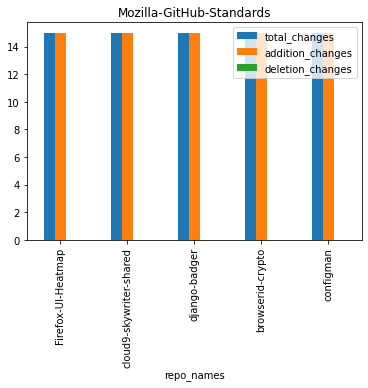

<Figure size 432x288 with 0 Axes>

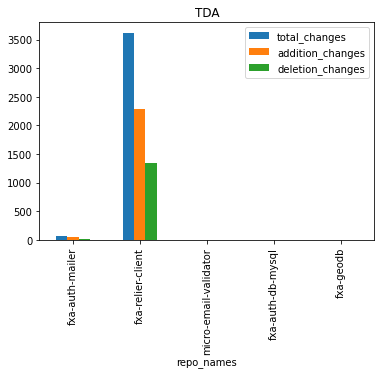

<Figure size 432x288 with 0 Axes>

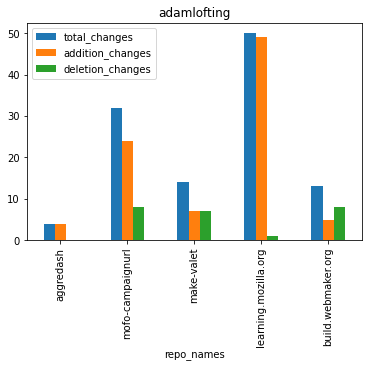

<Figure size 432x288 with 0 Axes>

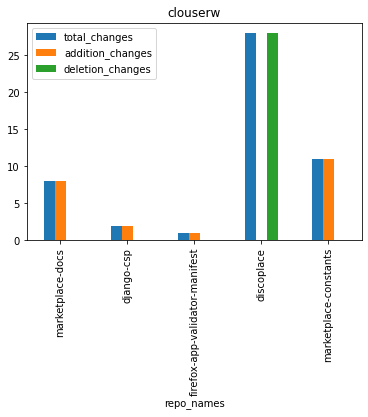

<Figure size 432x288 with 0 Axes>

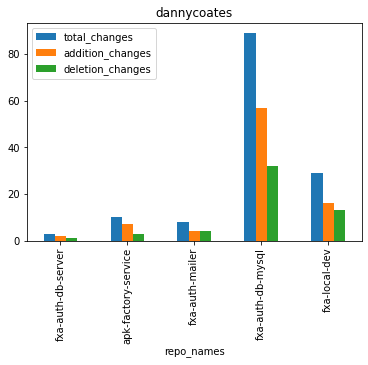

<Figure size 432x288 with 0 Axes>

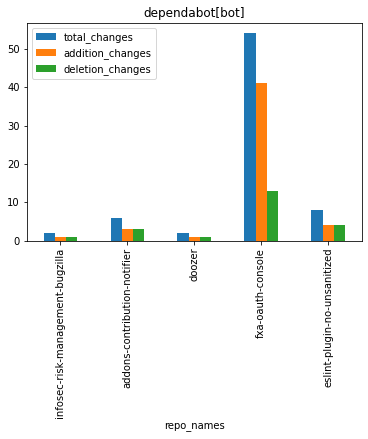

<Figure size 432x288 with 0 Axes>

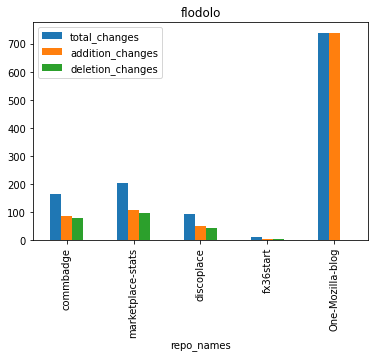

<Figure size 432x288 with 0 Axes>

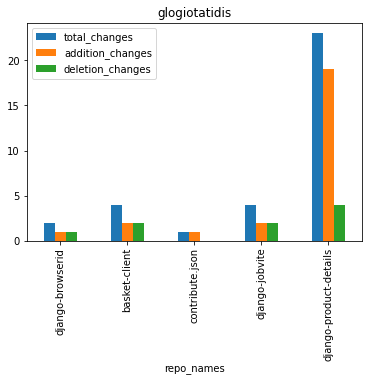

<Figure size 432x288 with 0 Axes>

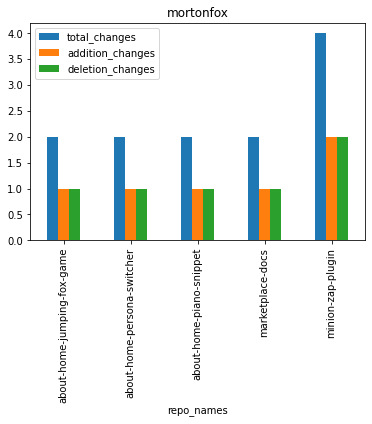

<Figure size 432x288 with 0 Axes>

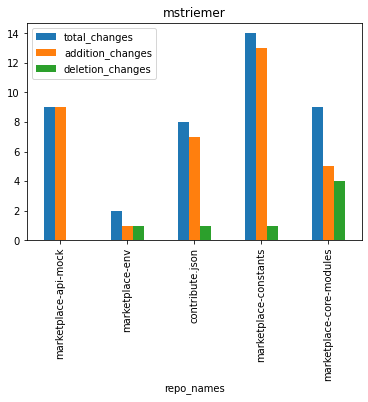

<Figure size 432x288 with 0 Axes>

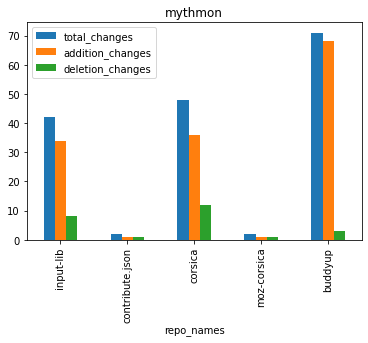

<Figure size 432x288 with 0 Axes>

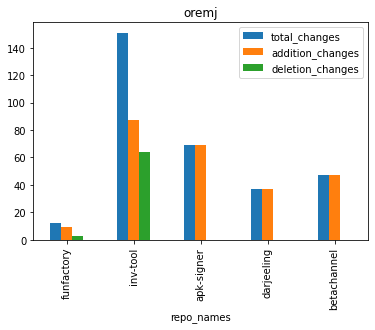

<Figure size 432x288 with 0 Axes>

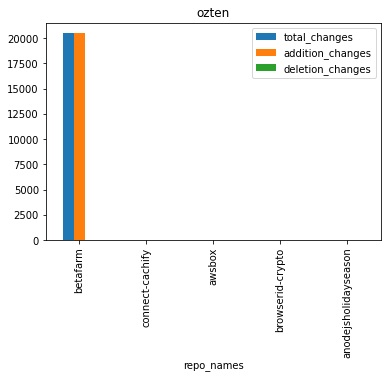

<Figure size 432x288 with 0 Axes>

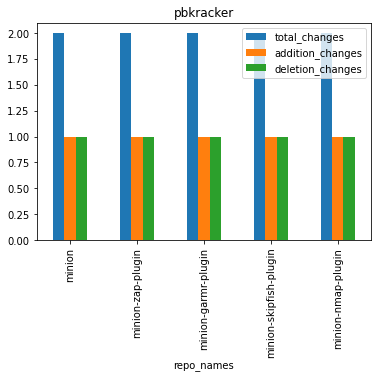

<Figure size 432x288 with 0 Axes>

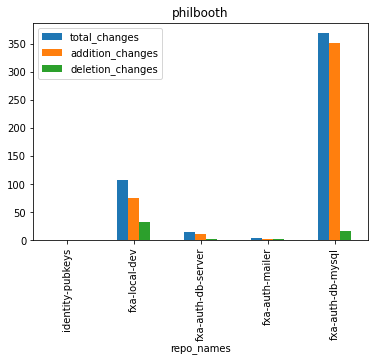

<Figure size 432x288 with 0 Axes>

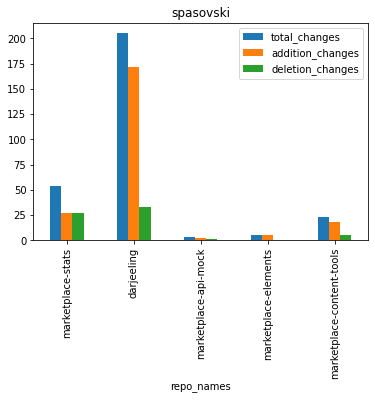

<Figure size 432x288 with 0 Axes>

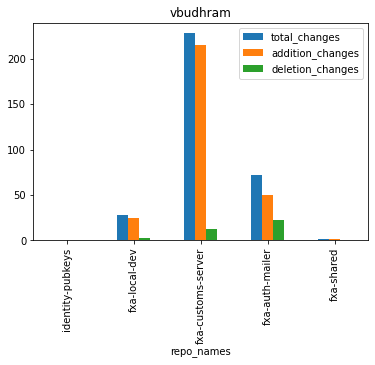

<Figure size 432x288 with 0 Axes>

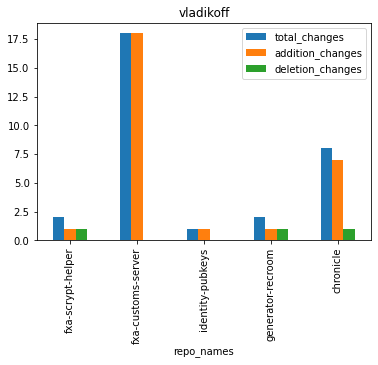

<Figure size 432x288 with 0 Axes>

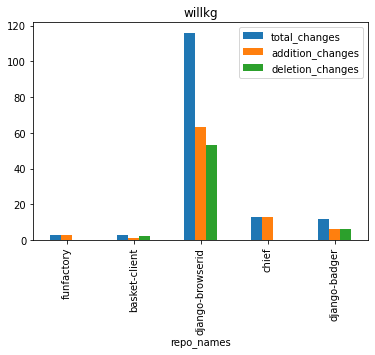

In [90]:
#got each user with contributions to five different repos in first 10 contributions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for each in final_each_user_to_five_repos_names:
    #print(users_five_repositories_groups.get_group(str(each)))
    group = users_five_repositories_groups.get_group(str(each))
    #print(group.drop_duplicates('ft_rname'))
    group_unique = group.drop_duplicates('ft_rname')
    print(group_unique)
    group_total = []
    group_addns = []
    group_delns = []
    idx =[]
    #for i in range(0,5):
    graph_count =0
    for k in group_unique['ft_total_changes']:
        if graph_count==5:
            break
        group_total.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_addns']:
        if graph_count==5:
            break
        group_addns.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_delns']:
        if graph_count==5:
            break
        group_delns.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_rname']: 
        if graph_count==5:
            break
        idx.append(k)
        graph_count = graph_count +1

    df = pd.DataFrame({
    "total_changes": group_total,
    "addition_changes": group_addns,
    "deletion_changes": group_delns,
    "repo_names": idx,
    #'repo_changes':user_repo_lang,
    })#columns =['total_changes','addition_changes','deletion_changes'])
    plt.figure()
    df['total_changes']= df['total_changes'].astype(int)
    df['addition_changes']= df['addition_changes'].astype(int)
    df['deletion_changes']= df['deletion_changes'].astype(int)

    #df=df.astype(int)
    #plt.title(each)
    #df_list.append(df)# for individual comment this line
    #lines = df.plot()
    df.plot(x = "repo_names", y=["total_changes","addition_changes","deletion_changes"],kind="bar" , title = each)


In [ ]:
#now do it for 5 repos having first contributions

# user_diffrepos_total 
repositories_five_users = f_data.groupby(['ft_rname']).nunique()
#print(user_diffrepos_total_changes_count)
repositories_five_users.sort_values(by = 'ft_uname',ascending=False,inplace=True)
#for i in users_five_repositories##:
#    if i >=5:
print(repositories_five_users['ft_uname'])

final_each_repo_to_five_users_series = repositories_five_users['ft_uname']


ft_rname
django-csp              23
django-browserid        23
infosec.mozilla.org     22
leadership-training     21
moz-corsica             20
                        ..
aggredash                1
all-aboard               1
amocontentguidelines     1
androidspeech            1
django-recaptcha         1
Name: ft_uname, Length: 305, dtype: int64


In [ ]:
# user_diffrepos_total 
repositories_five_users_groups = f_data.groupby(['ft_rname'])#.sort_values(ascending=False,inplace=True)
#print(user_diffrepos_total_changes_count)
#users_five_repositories_groups#.sort_values(ascending=False,inplace=True)
#print(users_five_repositories_groups.groups)
final_each_repo_to_five_users_names = []
for each in repositories_five_users_groups.groups:
    #if(each.size>=5):
    #print(each)
    if(final_each_repo_to_five_users_series[each]>=5):#users_five_repositories_groups.get_group(each).size >=5):
        print(each)
        final_each_repo_to_five_users_names.append(each)
        


Addon-Tests
Jisort
MakeAPI
Marketplace.PHP
One-Mozilla-blog
OpenDesign
PyBrowserID
activate.mozilla.community
addons
addons-contribution-notifier
advocacy.mozilla.org
arewefastyet
ateam-bootcamp
authenticator-rs
awsbox
basket-client
bleach
blurts-server
bouncer-tests
browserid-crypto
buddyup
build-relengdocs
build.webmaker.org
cerberus
cipherscan
commbadge
configman
connect-cachify
contain-facebook
contribute.json
corsica
darjeeling
deprecated-treestatus
django-badger
django-browserid
django-csp
django-product-details
django-session-csrf
dscontrib
dxr
eslint-plugin-no-unsanitized
fennec-search
firefox-browser-architecture
funfactory
fx36start
fxa-auth-db-mysql
fxa-auth-db-server
fxa-auth-mailer
fxa-local-dev
fxoss
geckodriver
high-fidelity
html5-lint
http-observatory
identity-pubkeys
inclusion
infernyx
infosec-risk-management-bugzilla
infosec.mozilla.org
input-tests
inv-tool
itisatrap
janus-plugin-rs
janus-plugin-sfu
jupyter-notebook-gist
jydoop
kuma-lib
leadership-training
lightbeam-w

In [ ]:
!pip install pandas-bokeh

import pandas as pd
import pandas_bokeh

pandas_bokeh.output_notebook()



In [ ]:
!pip install cufflinks

import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
#making all charts public and setting a global theme
cf.set_config_file(sharing='public',theme='ggplot',offline=False)

In [ ]:
#pandas_bokeh.output_file('eachrepo_5users.html')
pandas_bokeh.output_notebook()

In [ ]:
#got each user with contributions to five different repos in first 10 contributions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#fig = plt.figure(figsize =((8,6)))


for each in final_each_repo_to_five_users_names:
    #print(users_five_repositories_groups.get_group(str(each)))
    group = repositories_five_users_groups.get_group(str(each))
    #print(group.drop_duplicates('ft_rname'))
    group_unique = group.drop_duplicates('ft_uname')
    print(group_unique)
    group_total = []
    group_addns = []
    group_delns = []
    idx =[]
    #for i in range(0,5):
    graph_count =0
    for k in group_unique['ft_total_changes']:
        if graph_count==5:
            break
        group_total.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_addns']:
        if graph_count==5:
            break
        group_addns.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_delns']:
        if graph_count==5:
            break
        group_delns.append(k)
        graph_count = graph_count +1

    graph_count =0
    for k in group_unique['ft_uname']: 
        if graph_count==5:
            break
        idx.append(k)
        graph_count = graph_count +1

    df = pd.DataFrame({
    "total_changes": group_total,
    "addition_changes": group_addns,
    "deletion_changes": group_delns,
    "user_names": idx,
    #'repo_changes':user_repo_lang,
    })#columns =['total_changes','addition_changes','deletion_changes'])
    plt.figure(figsize =((8,6)))
    df['total_changes']= df['total_changes'].astype(int)
    df['addition_changes']= df['addition_changes'].astype(int)
    df['deletion_changes']= df['deletion_changes'].astype(int)

    #df=df.astype(int)
    #plt.title(each)
    #df_list.append(df)# for individual comment this line
    #lines = df.plot()
    #df.plot(x = "user_names", y=["total_changes","addition_changes","deletion_changes"],kind="bar" , title = each)
    #i=100
    #df = fig.add_subplot(i)
    #i=i+1
    df.plot_bokeh(kind='bar',x = "user_names",title = each)
    #df.iplot(kind = 'bar')
    plt.show()
#fig.savefig('output_of_5.pdf')

      Unnamed: 0   ft_uname  ...                             repodesc repolang
150          393    Marlena  ...  Tests for Mozilla's Add-ons website      NaN
642         2654  bebef1987  ...  Tests for Mozilla's Add-ons website      NaN
1682        6254  janderssn  ...  Tests for Mozilla's Add-ons website      NaN
2540        9918     p0deje  ...  Tests for Mozilla's Add-ons website      NaN
3116       11842      tobbi  ...  Tests for Mozilla's Add-ons website      NaN

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
383         1179  ...     Java
771         3206  ...     Java
1155        4678  ...     Java
1625        6193  ...     Java
2838       11266  ...     Java
2885       11409  ...     Java

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
276          855  ...  JavaScript
480         1497  ...  JavaScript
836         3443  ...  JavaScript
1593        6049  ...  JavaScript
1630        6198  ...  JavaScript
1720        6337  ...  JavaScript
2265        8393  ...  JavaScript
2889       11476  ...  JavaScript

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
99           340  ...      PHP
123          364  ...      PHP
356         1149  ...      PHP
1960        7156  ...      PHP
2903       11490  ...      PHP

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
190          512  ...      PHP
212          540  ...      PHP
275          854  ...      PHP
984         3901  ...      PHP
1093        4547  ...      PHP
1323        5043  ...      PHP
2754       10969  ...      PHP

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
259          787  ...      NaN
296          954  ...      NaN
546         2202  ...      NaN
562         2475  ...      NaN
621         2633  ...      NaN
1668        6240  ...      NaN
1953        7149  ...      NaN
2330        8678  ...      NaN
2637       10362  ...      NaN
3050       11760  ...      NaN
3208       12212  ...      NaN
3345       12553  ...      NaN

[12 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
98           339  ...   Python
213          541  ...   Python
328         1033  ...   Python
492         1719  ...   Python
1749        6428  ...   Python
2728       10722  ...   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0          ft_uname  ...                repodesc    repolang
168          418     MichaelKohler  ...  Activate campaign site  FreeMarker
1095        4549          deimidis  ...  Activate campaign site  FreeMarker
1302        5022            fgilio  ...  Activate campaign site  FreeMarker
1653        6225    ioana-chiorean  ...  Activate campaign site  FreeMarker
1868        6829  jonathanKingston  ...  Activate campaign site  FreeMarker
2192        8181          mathjazz  ...  Activate campaign site  FreeMarker
3271       12363         wagnerand  ...  Activate campaign site  FreeMarker
3328       12536       wisniewskit  ...  Activate campaign site  FreeMarker

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
52           202  ...      NaN
342         1065  ...      NaN
735         2973  ...      NaN
1262        4892  ...      NaN
1341        5064  ...      NaN
2165        7989  ...      NaN
2822       11232  ...      NaN
3269       12361  ...      NaN

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
849         3458  ...  JavaScript
1107        4575  ...  JavaScript
1491        5468  ...  JavaScript
1920        6976  ...  JavaScript
2945       11572  ...  JavaScript
3270       12362  ...  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0     ft_uname  ... repodesc    repolang
165          415    Melechuga  ...      NaN  JavaScript
460         1472      alanmoo  ...      NaN  JavaScript
759         3033  brettgaylor  ...      NaN  JavaScript
1330        5053     flukeout  ...      NaN  JavaScript
2923       11515     simonwex  ...      NaN  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
714         2813  ...  JavaScript
1537        5987  ...  JavaScript
2008        7291  ...  JavaScript
2039        7394  ...  JavaScript
2264        8392  ...  JavaScript
2486        9711  ...  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0         ft_uname  ...         repodesc repolang
1772        6507          jgraham  ...  A-team bootcamp   Python
1863        6822  jonallengriffin  ...  A-team bootcamp   Python
2548        9926         parkouss  ...  A-team bootcamp   Python
3097       11823     thrashergirl  ...  A-team bootcamp   Python
3132       11964            tojon  ...  A-team bootcamp   Python
3203       12207  vaibhavmagarwal  ...  A-team bootcamp   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
51           201  ...     Rust
1257        4887  ...     Rust
1436        5406  ...     Rust
1731        6410  ...     Rust
1903        6959  ...     Rust

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
1743        6422  ...  JavaScript
2128        7832  ...  JavaScript
2532        9801  ...  JavaScript
2878       11380  ...  JavaScript
2919       11511  ...  JavaScript
3261       12353  ...  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
142          385  ...   Python
674         2747  ...   Python
1156        4679  ...   Python
1461        5435  ...   Python
2740       10890  ...   Python
2790       11015  ...   Python
3319       12504  ...   Python

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
290          948  ...   Python
1230        4775  ...   Python
1678        6250  ...   Python
2108        7710  ...   Python
2219        8225  ...   Python
2362        8914  ...   Python
2770       10985  ...   Python
2820       11230  ...   Python
2827       11237  ...   Python
3399       12683  ...   Python

[10 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
178          438  ...  FreeMarker
1878        6843  ...  FreeMarker
2062        7483  ...  FreeMarker
2468        9489  ...  FreeMarker
2652       10377  ...  FreeMarker

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
5              5  ...      NaN
1469        5446  ...      NaN
2666       10391  ...      NaN
2850       11287  ...      NaN
3023       11711  ...      NaN
3032       11720  ...      NaN
3073       11797  ...      NaN

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
209          537  ...  JavaScript
651         2718  ...  JavaScript
1335        5058  ...  JavaScript
1745        6424  ...  JavaScript
1803        6570  ...  JavaScript
2087        7665  ...  JavaScript
2167        7991  ...  JavaScript
2533        9802  ...  JavaScript
2869       11368  ...  JavaScript
3085       11810  ...  JavaScript
3273       12365  ...  JavaScript

[11 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
111          352  ...  JavaScript
401         1216  ...  JavaScript
2423        9168  ...  JavaScript
2694       10423  ...  JavaScript
2742       10892  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0      ft_uname  ...                 repodesc repolang
432         1271          ahal  ...  releng engineering docs   Python
565         2478       armenzg  ...  releng engineering docs   Python
1148        4662      djmitche  ...  releng engineering docs   Python
1604        6078         hwine  ...  releng engineering docs   Python
2260        8388  mitchhentges  ...  releng engineering docs   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
283          862  ...      CSS
413         1228  ...      CSS
1082        4532  ...      CSS
1748        6427  ...      CSS
2883       11407  ...      CSS

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
45           195  ...   Python
343         1066  ...   Python
907         3680  ...   Python
1282        4930  ...   Python
1864        6825  ...   Python
3240       12246  ...   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
230          638  ...   Python
609         2562  ...   Python
1173        4699  ...   Python
2609       10312  ...   Python
2917       11509  ...   Python
3133       11965  ...   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
367         1162  ...      CSS
604         2557  ...      CSS
866         3475  ...      CSS
887         3606  ...      CSS
1069        4247  ...      CSS
1314        5034  ...      CSS
1995        7277  ...      CSS
2028        7368  ...      CSS
2193        8182  ...      CSS
2458        9400  ...      CSS
2596       10179  ...      CSS
3193       12192  ...      CSS

[12 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
210          538  ...   Python
416         1242  ...   Python
738         2976  ...   Python
862         3471  ...   Python
1244        4848  ...   Python
2590       10112  ...   Python
3164       12106  ...   Python

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
595         2548  ...  JavaScript
1645        6217  ...  JavaScript
2095        7673  ...  JavaScript
2158        7982  ...  JavaScript
2164        7988  ...  JavaScript
2531        9800  ...  JavaScript
2567        9945  ...  JavaScript
3331       12539  ...  JavaScript

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
0              0  ...  JavaScript
221          629  ...  JavaScript
253          781  ...  JavaScript
1877        6838  ...  JavaScript
2196        8185  ...  JavaScript
2296        8637  ...  JavaScript
2452        9394  ...  JavaScript
3005       11685  ...  JavaScript
3159       12101  ...  JavaScript

[9 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
107          348  ...     Less
286          944  ...     Less
446         1358  ...     Less
1171        4697  ...     Less
1462        5436  ...     Less
1834        6728  ...     Less
1987        7269  ...     Less
2052        7447  ...     Less
2379        8938  ...     Less
2417        9162  ...     Less
2611       10314  ...     Less

[11 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
242          770  ...  JavaScript
625         2637  ...  JavaScript
1345        5068  ...  JavaScript
2418        9163  ...  JavaScript
2627       10330  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0       ft_uname  ...              repodesc    repolang
899         3618  chuckharmston  ...  an offline app store  JavaScript
1131        4599           diox  ...  an offline app store  JavaScript
2166        7990        maktrix  ...  an offline app store  JavaScript
2519        9788          oremj  ...  an offline app store  JavaScript
2967       11600      spasovski  ...  an offline app store  JavaScript
3250       12261     vivekkiran  ...  an offline app store  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0   ft_uname  ...       repodesc repolang
113          354    KWierso  ...  See RelengAPI      NaN
297          955  Standard8  ...  See RelengAPI      NaN
1179        4705   edmorley  ...  See RelengAPI      NaN
1269        4899    ewongbb  ...  See RelengAPI      NaN
1479        5456  graememcc  ...  See RelengAPI      NaN
2947       11574    solarce  ...  See RelengAPI      NaN
3282       12374    warunsl  ...  See RelengAPI      NaN

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
208          536  ...   Python
596         2549  ...   Python
1603        6077  ...   Python
2037        7392  ...   Python
2115        7717  ...   Python
2191        8180  ...   Python
2768       10983  ...   Python
3327       12512  ...   Python

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
494         1721  ...  JavaScript
791         3347  ...  JavaScript
853         3462  ...  JavaScript
857         3466  ...  JavaScript
1182        4708  ...  JavaScript
1333        5056  ...  JavaScript
1337        5060  ...  JavaScript
1435        5405  ...  JavaScript
1458        5432  ...  JavaScript
1482        5459  ...  JavaScript
1517        5609  ...  JavaScript
1892        6861  ...  JavaScript
2017        7300  ...  JavaScript
2595       10117  ...  JavaScript
2655       10380  ...  JavaScript
2737       10887  ...  JavaScript
2789       11014  ...  JavaScript
2811       11164  ...  JavaScript
2904       11491  ...  JavaScript
3047       11757  ...  JavaScript
3320       12505  ...  JavaScript
3333       12541  ...  JavaScript
3374       12607  ...  JavaScript

[23 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
49           199  ...   Python
53           203  ...   Python
77           248  ...   Python
110          351  ...   Python
112          353  ...   Python
229          637  ...   Python
592         2545  ...   Python
925         3707  ...   Python
928         3710  ...   Python
1334        5057  ...   Python
1349        5072  ...   Python
1484        5461  ...   Python
1582        6038  ...   Python
1676        6248  ...   Python
1717        6334  ...   Python
1866        6827  ...   Python
1951        7147  ...   Python
2230        8278  ...   Python
2259        8387  ...   Python
2451        9393  ...   Python
2597       10180  ...   Python
2623       10326  ...   Python
2661       10386  ...   Python

[23 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
1092        4546  ...   Python
1467        5441  ...   Python
1919        6975  ...   Python
2615       10318  ...   Python
2739       10889  ...   Python
3334       12542  ...   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
141          384  ...   Python
542         2198  ...   Python
856         3465  ...   Python
2301        8642  ...   Python
2566        9944  ...   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0         ft_uname  ... repodesc repolang
307          965      SuYoungHong  ...      NaN   Python
662         2735      benmiroglio  ...      NaN   Python
1292        5012    felixlawrence  ...      NaN   Python
1664        6236  irrationalagent  ...      NaN   Python
1804        6571        jmccrosky  ...      NaN   Python
3287       12379          wcbeard  ...      NaN   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0      ft_uname  ...                             repodesc repolang
147          390  MarkoSchuetz  ...  Powerful search for large codebases   Python
1184        4710         ehsan  ...  Powerful search for large codebases   Python
1231        4777      erikrose  ...  Powerful search for large codebases   Python
1264        4894         evmar  ...  Powerful search for large codebases   Python
1362        5146      garnacho  ...  Powerful search for large codebases   Python
1416        5370         gicmo  ...  Powerful search for large codebases   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
120          361  ...  JavaScript
306          964  ...  JavaScript
1113        4581  ...  JavaScript
2322        8670  ...  JavaScript
3174       12166  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
58           208  ...     Java
2042        7397  ...     Java
2135        7839  ...     Java
2429        9285  ...     Java
2662       10387  ...     Java
2776       11001  ...     Java

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
200          528  ...      CSS
289          947  ...      CSS
677         2753  ...      CSS
947         3759  ...      CSS
1194        4720  ...      CSS
1325        5048  ...      CSS
1824        6668  ...      CSS
2780       11005  ...      CSS

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
445         1357  ...   Python
1762        6475  ...   Python
2516        9785  ...   Python
2586       10108  ...   Python
2732       10882  ...   Python
3122       11849  ...   Python
3151       12021  ...   Python
3318       12503  ...   Python

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
78           249  ...      CSS
214          542  ...      CSS
892         3611  ...      CSS
1322        5042  ...      CSS
1882        6847  ...      CSS
2549        9927  ...      CSS
2901       11488  ...      CSS

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
321         1001  ...  JavaScript
1051        4211  ...  JavaScript
1213        4758  ...  JavaScript
1681        6253  ...  JavaScript
2605       10188  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
877         3486  ...  JavaScript
1046        4206  ...  JavaScript
1212        4757  ...  JavaScript
1893        6862  ...  JavaScript
2568        9946  ...  JavaScript
2602       10185  ...  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
318          998  ...      NaN
1049        4209  ...      NaN
1218        4763  ...      NaN
2604       10187  ...      NaN
2825       11235  ...      NaN
2965       11598  ...      NaN
3215       12220  ...      NaN
3383       12621  ...      NaN

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
867         3476  ...    Shell
1052        4212  ...    Shell
1220        4765  ...    Shell
1881        6846  ...    Shell
2494        9719  ...    Shell
2599       10182  ...    Shell
3213       12218  ...    Shell
3256       12267  ...    Shell
3384       12622  ...    Shell

[9 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
105          346  ...  JavaScript
666         2739  ...  JavaScript
1024        4093  ...  JavaScript
1764        6477  ...  JavaScript
2285        8450  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0              ft_uname  ...               repodesc repolang
515         1752             andreastt  ...  WebDriver for Firefox      NaN
1773        6508               jgraham  ...  WebDriver for Firefox      NaN
1909        6965                juangj  ...  WebDriver for Firefox      NaN
2190        8179  martiansideofthemoon  ...  WebDriver for Firefox      NaN
2425        9281           mythsunwind  ...  WebDriver for Firefox      NaN
2485        9710               nikolas  ...  WebDriver for Firefox      NaN

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
122          363  ...  JavaScript
793         3349  ...  JavaScript
1014        3965  ...  JavaScript
1718        6335  ...  JavaScript
2159        7983  ...  JavaScript
2299        8640  ...  JavaScript
2404        9132  ...  JavaScript
2957       11590  ...  JavaScript
3106       11832  ...  JavaScript
3125       11852  ...  JavaScript

[10 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
372         1167  ...   Python
535         2191  ...   Python
1034        4163  ...   Python
1719        6336  ...   Python
1916        6972  ...   Python
2254        8382  ...   Python
2256        8384  ...   Python
2879       11403  ...   Python
2902       11489  ...   Python

[9 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0      ft_uname  ...                  repodesc repolang
490         1717     allanjude  ...  Mozilla HTTP Observatory   Python
512         1749      amuntner  ...  Mozilla HTTP Observatory   Python
994         3911  craigfrancis  ...  Mozilla HTTP Observatory   Python
1377        5171   gdestuynder  ...  Mozilla HTTP Observatory   Python
1703        6312       jarondl  ...  Mozilla HTTP Observatory   Python
1959        7155    kingthorin  ...  Mozilla HTTP Observatory   Python
2041        7396        lchski  ...  Mozilla HTTP Observatory   Python
3104       11830     tigertoes  ...  Mozilla HTTP Observatory   Python

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
125          366  ...      NaN
872         3481  ...      NaN
911         3684  ...      NaN
1388        5250  ...      NaN
1690        6262  ...      NaN
2439        9301  ...      NaN
2598       10181  ...      NaN
2704       10602  ...      NaN
2821       11231  ...      NaN
3192       12191  ...      NaN
3212       12217  ...      NaN
3253       12264  ...      NaN

[12 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
108          349  ...      NaN
146          389  ...      NaN
269          848  ...      NaN
389         1185  ...      NaN
455         1467  ...      NaN
605         2558  ...      NaN
1398        5346  ...      NaN
1747        6426  ...      NaN
2107        7709  ...      NaN
2255        8383  ...      NaN
2428        9284  ...      NaN
2544        9922  ...      NaN
2577       10099  ...      NaN
2683       10412  ...      NaN
2916       11508  ...      NaN
3060       11770  ...      NaN
3061       11771  ...      NaN
3376       12609  ...      NaN

[18 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
1211        4756  ...   Python
2441        9303  ...   Python
2526        9795  ...   Python
2705       10603  ...   Python
3160       12102  ...   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
848         3457  ...   Python
923         3696  ...   Python
1106        4574  ...   Python
1313        5033  ...   Python
2940       11567  ...   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
50           200  ...  JavaScript
71           242  ...  JavaScript
145          388  ...  JavaScript
601         2554  ...  JavaScript
846         3455  ...  JavaScript
851         3460  ...  JavaScript
891         3610  ...  JavaScript
916         3689  ...  JavaScript
1229        4774  ...  JavaScript
1279        4927  ...  JavaScript
1378        5172  ...  JavaScript
1391        5253  ...  JavaScript
1581        6037  ...  JavaScript
1689        6261  ...  JavaScript
1738        6417  ...  JavaScript
2545        9923  ...  JavaScript
2624       10327  ...  JavaScript
2775       11000  ...  JavaScript
2852       11289  ...  JavaScript
2939       11566  ...  JavaScript
3002       11682  ...  JavaScript
3026       11714  ...  JavaScript

[22 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0         ft_uname  ...                          repodesc repolang
9              9  AutomatedTester  ...  Tests for Mozilla Input website.      NaN
638         2650        bebef1987  ...  Tests for Mozilla Input website.      NaN
725         2824    bobsilverberg  ...  Tests for Mozilla Input website.      NaN
1072        4250         davehunt  ...  Tests for Mozilla Input website.      NaN
2711       10609         retornam  ...  Tests for Mozilla Input website.      NaN
2993       11658    stephendonner  ...  Tests for Mozilla Input website.      NaN
3109       11835            tobbi  ...  Tests for Mozilla Input website.      NaN
3239       12245         vish-moz  ...  Tests for Mozilla Input website.      NaN
3386       12625             zacc  ...  Tests for Mozilla Input website.      NaN

[9 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0       ft_uname  ...                               repodesc repolang
687         2763       bhearsum  ...  A command line interface to inventory   Python
1141        4655       djmitche  ...  A command line interface to inventory   Python
1311        5031  floatingatoll  ...  A command line interface to inventory   Python
1918        6974        jvehent  ...  A command line interface to inventory   Python
2072        7545          limed  ...  A command line interface to inventory   Python
2517        9786          oremj  ...  A command line interface to inventory   Python
3184       12183          uberj  ...  A command line interface to inventory   Python
3288       12380            whd  ...  A command line interface to inventory   Python

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
667         2740  ...     HTML
826         3433  ...     HTML
1191        4717  ...     HTML
2900       11487  ...     HTML
3119       11846  ...     HTML

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
121          362  ...     Rust
1298        5018  ...     Rust
1407        5355  ...     Rust
1671        6243  ...     Rust
2344        8772  ...     Rust
3224       12229  ...     Rust

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
575         2522  ...     Rust
781         3311  ...     Rust
1409        5357  ...     Rust
2345        8773  ...     Rust
3223       12228  ...     Rust

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
422         1248  ...   Python
2209        8201  ...   Python
2398        9126  ...   Python
2906       11493  ...   Python
3348       12556  ...   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0    ft_uname  ...                               repodesc repolang
812         3380   bsmedberg  ...  Efficient Hadoop Map-Reduce in Python   Python
1375        5169  gavinsharp  ...  Efficient Hadoop Map-Reduce in Python   Python
1635        6203    indygreg  ...  Efficient Hadoop Map-Reduce in Python   Python
2352        8854   mreid-moz  ...  Efficient Hadoop Map-Reduce in Python   Python
3051       11761   tarasglek  ...  Efficient Hadoop Map-Reduce in Python   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0     ft_uname  ...                 repodesc repolang
143          386      LucianU  ...  Vendor library for Kuma   Python
1068        4242     darkwing  ...  Vendor library for Kuma   Python
1518        5610  groovecoder  ...  Vendor library for Kuma   Python
1752        6431       jezdez  ...  Vendor library for Kuma   Python
2110        7712    lmorchard  ...  Vendor library for Kuma   Python
3185       12184  ubernostrum  ...  Vendor library for Kuma   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
257          785  ...      CSS
384         1180  ...      CSS
390         1186  ...      CSS
509         1746  ...      CSS
548         2204  ...      CSS
622         2634  ...      CSS
675         2751  ...      CSS
684         2760  ...      CSS
760         3034  ...      CSS
854         3463  ...      CSS
869         3478  ...      CSS
1045        4205  ...      CSS
1167        4693  ...      CSS
1387        5249  ...      CSS
2653       10378  ...      CSS
2738       10888  ...      CSS
2854       11291  ...      CSS
2905       11492  ...      CSS
3046       11756  ...      CSS
3266       12358  ...      CSS
3398       12682  ...      CSS

[21 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
225          633  ...  JavaScript
697         2794  ...  JavaScript
1680        6252  ...  JavaScript
1874        6835  ...  JavaScript
2642       10367  ...  JavaScript

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...    repolang
278          857  ...  JavaScript
411         1226  ...  JavaScript
1527        5914  ...  JavaScript
1725        6342  ...  JavaScript
1931        7075  ...  JavaScript
2555        9933  ...  JavaScript

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0       ft_uname  ...                              repodesc repolang
897         3616  chuckharmston  ...  Mock API for the Firefox Marketplace   Python
1015        3966           cvan  ...  Mock API for the Firefox Marketplace   Python
1126        4594           diox  ...  Mock API for the Firefox Marketplace   Python
2377        8936      mstriemer  ...  Mock API for the Firefox Marketplace   Python
2467        9409       ngokevin  ...  Mock API for the Firefox Marketplace   Python
2968       11601      spasovski  ...  Mock API for the Firefox Marketplace   Python

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ...  repolang
511         1748  ...  Makefile
561         2474  ...  Makefile
906         3626  ...  Makefile
926         3708  ...  Makefile
1261        4891  ...  Makefile
2188        8177  ...  Makefile
2308        8649  ...  Makefile
2658       10383  ...  Makefile

[8 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
499         1726  ...      CSS
1114        4582  ...      CSS
1315        5035  ...      CSS
1997        7279  ...      CSS
2030        7370  ...      CSS
2966       11599  ...      CSS
3197       12196  ...      CSS

[7 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
473         1490  ...      CSS
1922        6978  ...      CSS
2234        8282  ...      CSS
2616       10319  ...      CSS
2989       11654  ...      CSS

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
129          370  ...      PHP
420         1246  ...      PHP
739         2977  ...      PHP
855         3464  ...      PHP
893         3612  ...      PHP
1056        4230  ...      PHP
1105        4573  ...      PHP
1168        4694  ...      PHP
1180        4706  ...      PHP
1573        6029  ...      PHP
2097        7690  ...      PHP
2543        9921  ...      PHP
2673       10398  ...      PHP
2685       10414  ...      PHP
3027       11715  ...      PHP

[15 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0         ft_uname  ...        repodesc repolang
370         1165         ZaiLynch  ...  Minion Backend   Python
594         2547  ashleyblackmore  ...  Minion Backend   Python
627         2639           bartek  ...  Minion Backend   Python
2456        9398        netmarkjp  ...  Minion Backend   Python
3358       12580          yeukhon  ...  Minion Backend   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0      ft_uname  ...                            repodesc repolang
665         2738  bensternthal  ...  A blank template for Open Web Apps      CSS
2767       10982           rlr  ...  A blank template for Open Web Apps      CSS
2799       11057       rodms10  ...  A blank template for Open Web Apps      CSS
2958       11591          sole  ...  A blank template for Open Web Apps      CSS
3222       12227       victorb  ...  A blank template for Open Web Apps      CSS

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
7              7  ...    Shell
119          360  ...    Shell
160          410  ...    Shell
201          529  ...    Shell
223          631  ...    Shell
822         3429  ...    Shell
1123        4591  ...    Shell
1189        4715  ...    Shell
1193        4719  ...    Shell
1342        5065  ...    Shell
1631        6199  ...    Shell
1730        6409  ...    Shell
1746        6425  ...    Shell
1792        6559  ...    Shell
1985        7267  ...    Shell
2131        7835  ...    Shell
2422        9167  ...    Shell
2614       10317  ...    Shell
3036       11724  ...    Shell
3347       12555  ...    Shell

[20 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
69           240  ...   Python
217          625  ...   Python
471         1488  ...   Python
1154        4677  ...   Python
2405        9133  ...   Python

[5 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0  ... repolang
103          344  ...      PHP
985         3902  ...      PHP
1000        3917  ...      PHP
1059        4233  ...      PHP
1374        5168  ...      PHP
2085        7663  ...      PHP

[6 rows x 19 columns]


<Figure size 576x432 with 0 Axes>

      Unnamed: 0        ft_uname  ...              repodesc    repolang
6              6      AlphaRoy14  ...  Mozilla Campus Clubs  JavaScript
216          624        Muljayan  ...  Mozilla Campus Clubs  JavaScript
294          952       Srushtika  ...  Mozilla Campus Clubs  JavaScript
610         2563      bacharakis  ...  Mozilla Campus Clubs  JavaScript
999         3916           cseas  ...  Mozilla Campus Clubs  JavaScript
1280        4928         fayepal  ...  Mozilla Campus Clubs  JavaScript
1570        6026     hardlyhuman  ...  Mozilla Campus Clubs  JavaScript
1571        6027    hellokarthic  ...  Mozilla Campus Clubs  JavaScript
1592        6048  hossainalikram  ...  Mozilla Campus Clubs  JavaScript
1658        6230  ioana-chiorean  ...  Mozilla Campus Clubs  JavaScript
2665       10390        razat249  ...  Mozilla Campus Clubs  JavaScript
3033       11721         suriyaa  ...  Mozilla Campus Clubs  JavaScript
3238       12244     vipinkhushu  ...  Mozilla Campus Clubs  Jav

<Figure size 576x432 with 0 Axes>

# plotly Interactive plots

In [ ]:
#done every thing above so commenting these
'''
!pip install pandas-bokeh

import pandas as pd
import pandas_bokeh
'''
# pandas_bokeh.output_file(filename): for exporting plots as HTML.
# pandas_bokeh.output_notebook()#: for embedding plots in Jupyter Notebooks.
#dataframe.plot_bokeh()
# nifty_data_resample.plot_bokeh(kind='bar',figsize=(10,6));
# nifty_data_resample.plot_bokeh(kind='barh',stacked=True);

''' pip install cufflinks
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
#making all charts public and setting a global theme
cf.set_config_file(sharing='public',theme='white',offline=True)

nifty_data_resample.iplot(kind='bar');
nifty_data_resample.iplot(kind='barh',barmode = 'stack');

'''

" pip install cufflinks\nimport pandas as pd\nimport cufflinks as cf\nfrom IPython.display import display,HTML\n#making all charts public and setting a global theme\ncf.set_config_file(sharing='public',theme='white',offline=True)\n\nnifty_data_resample.iplot(kind='bar');\nnifty_data_resample.iplot(kind='barh',barmode = 'stack');\n\n"

In [ ]:
!pip install cufflinks

import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
#making all charts public and setting a global theme
cf.set_config_file(sharing='public',theme='white',offline=True)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show


lang_df = pd.DataFrame(lang_count,lang_names)

p = figure(plot_width=400, plot_height=300)

p=plt.figure(figsize = (40, 5))
'''
lang_df=lang_df.astype(int)
lang_df.plot.bar()
plt.axhline(0, color="k")
'''
'''
plt.bar(lang_names, lang_count, color ='green',width = 0.3)
 
plt.xlabel("Langauges")
plt.ylabel("No. of repositories in each Language")
plt.title("Repo Lang Plot")
plt.show()
'''

#p.vbar(lang_count,lang_names)
#p.xaxis.major_label_orientation = "vertical"
lang_df.plot_bokeh(kind='bar')
#show(p)



Figure(id='383133', ...)

<Figure size 2880x360 with 0 Axes>

In [ ]:
lang_df.plot_bokeh(kind='pie')

__x__values_original


Figure(id='372957', ...)

In [ ]:
#pandas_bokeh.output_notebook()
#lang_df.plot_bokeh(kind = 'bar', figsize=(10,6), axis ='x')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

log_total = np.log10(f_data['ft_total_changes'])
log_addns = np.log10(f_data['ft_addns'])
log_delns = np.log10(f_data['ft_delns'])



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10



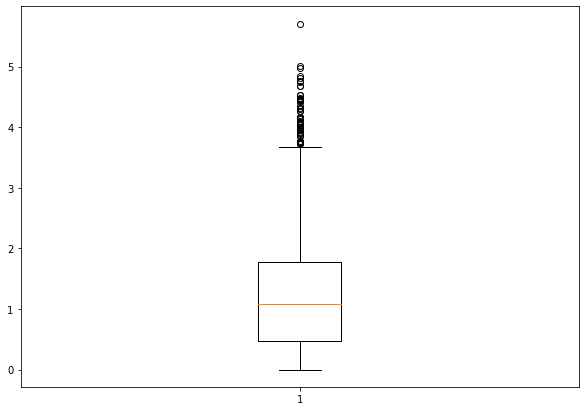

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(log_total)
plt.show()

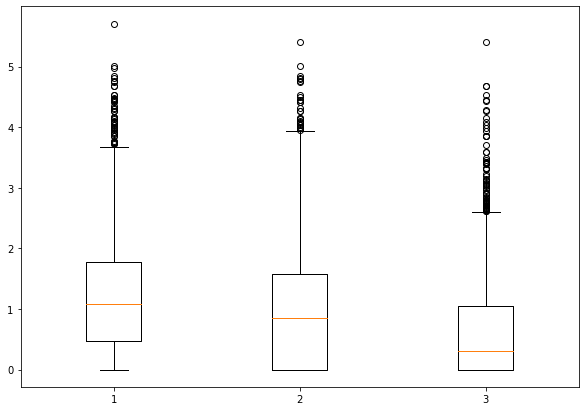

In [ ]:
data = [log_total, log_addns, log_delns]
fig = plt.figure(figsize =(10, 7))
bp = plt.boxplot(data)
plt.show()

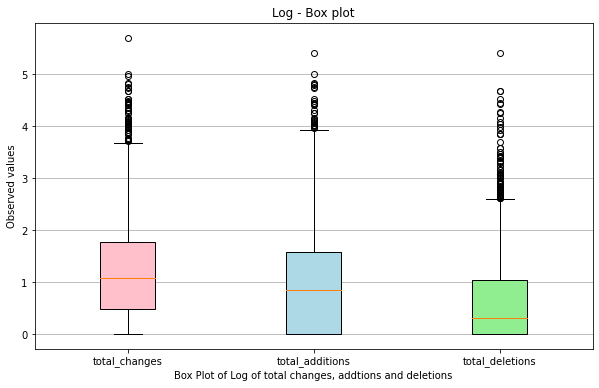

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['total_changes','total_additions', 'total_deletions']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# rectangular box plot
bplot1 = ax.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax.set_title('Log - Box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Box Plot of Log of total changes, addtions and deletions')
ax.set_ylabel('Observed values')

plt.show()


In [ ]:
dataf = pd.DataFrame(log_total, log_addns, log_delns)
log_total.plot_bokeh(kind ='point')

Figure(id='373727', ...)